In [26]:
!pip install -q pandas numpy matplotlib seaborn xgboost shap

In [27]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [28]:
%matplotlib inline

In [29]:
# Fungsi untuk load dataset diabetes
def load_data(path="../data/raw/diabetes.csv"):
    """
    Membaca dataset dari path yang diberikan dan menampilkan preview,
    info kolom, dan shape dataset.
    """
    df = pd.read_csv(path)
    
    print("\n=== Dataset Preview ===")
    display(df.head())

    print("\n=== Dataset Info ===")
    print(df.info())

    print("\n=== Dataset Shape ===")
    print(df.shape)

    return df

# Load dataset
df = load_data()


=== Dataset Preview ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

=== Dataset Shape ===
(768, 9)



=== Statistik Deskriptif ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



=== Distribusi Target ===


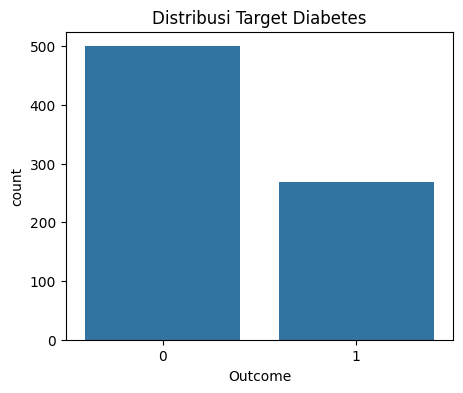

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

=== Heatmap Korelasi Fitur ===


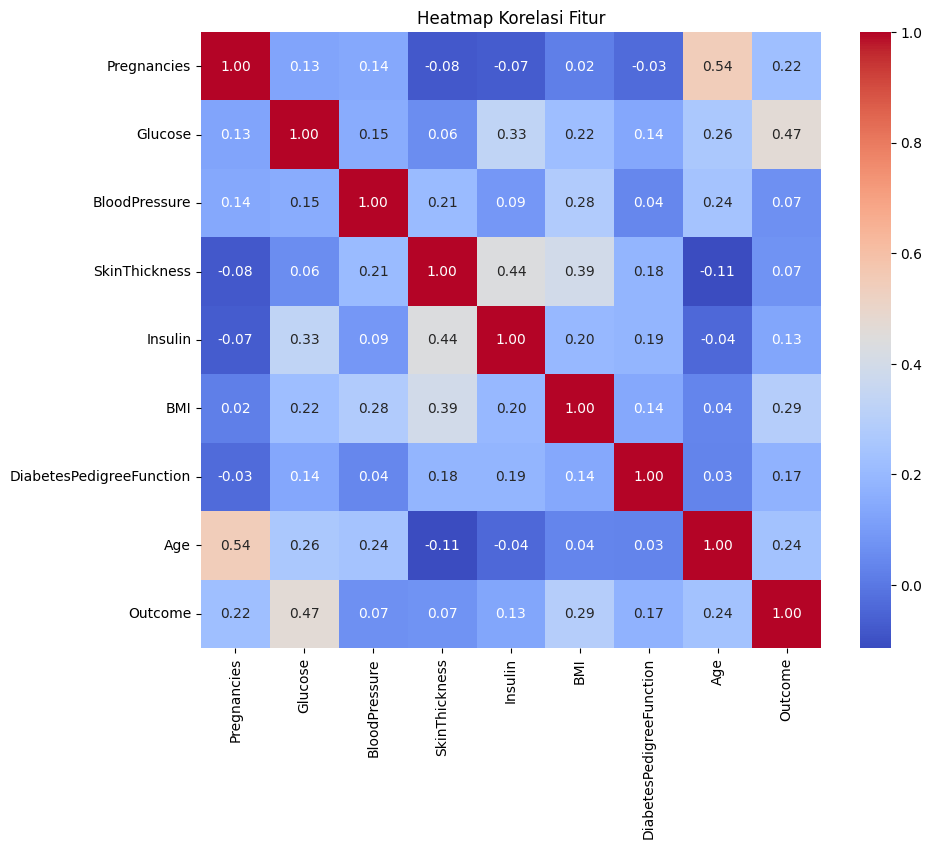


=== Boxplot (Outlier Detection) ===


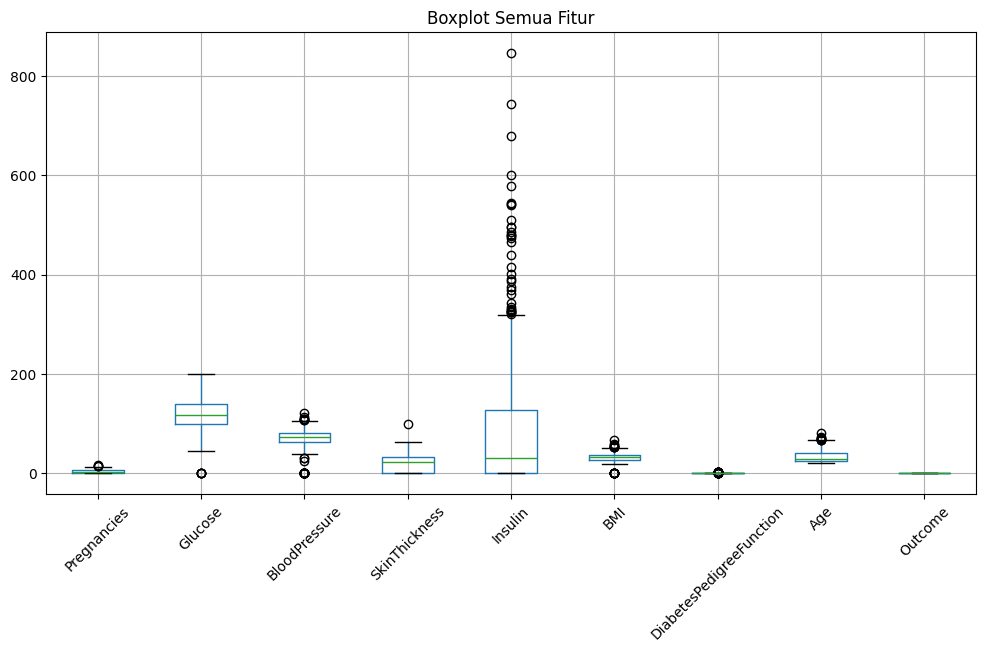


Tidak ada missing value di dataset.


In [30]:
def run_eda(df):
    """
    Melakukan analisis deskriptif dan visualisasi dataset,
    termasuk distribusi target, korelasi fitur, boxplot, dan missing value.
    """
    print("\n=== Statistik Deskriptif ===")
    display(df.describe())

    # Distribusi target
    print("\n=== Distribusi Target ===")
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x="Outcome")
    plt.title("Distribusi Target Diabetes")
    plt.show()
    print(df["Outcome"].value_counts(normalize=True))

    # Heatmap korelasi fitur
    print("\n=== Heatmap Korelasi Fitur ===")
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Heatmap Korelasi Fitur")
    plt.show()

    # Boxplot untuk deteksi outlier
    print("\n=== Boxplot (Outlier Detection) ===")
    plt.figure(figsize=(12,6))
    df.boxplot()
    plt.title("Boxplot Semua Fitur")
    plt.xticks(rotation=45)
    plt.show()

    # Missing value
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]  

    if not missing_counts.empty:
        print("\n=== Missing Value Boxplot ===")
        plt.figure(figsize=(8,4))
        sns.boxplot(x=missing_counts.values)
        plt.title("Distribusi Jumlah Missing Value per Kolom")
        plt.xlabel("Jumlah Missing Value")
        plt.show()
    else:
        print("\nTidak ada missing value di dataset.")

# Jalankan EDA
run_eda(df)